In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras_visualizer import visualizer 
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

In [2]:
filename = "/Users/romi_sai/Desktop/College/Senior/Summer2021/CSE474/Assignments/Assignment2/diabetes.csv"

In [3]:
#opening csv & reading in rows 
#some parts of this code was found on Python Docs (https://docs.python.org/3/library/csv.html)
with open(filename, newline='') as csvfile:
    lines = csv.reader(csvfile)
    rows=[]
    for row in lines:
        rows.append(row)

In [4]:
#Converting the age, bmi, glucose and outcome to lists for easy access
pregnancies=[]
glucose=[]
bp=[]
skinthickness=[]
insulin=[]
bmi=[]
pedigree=[]
age=[]
out=[]
for thing in rows:
    pregnancies.append(thing[0])
    glucose.append(thing[1])
    bp.append(thing[2])
    skinthickness.append(thing[3])
    insulin.append(thing[4])
    bmi.append(thing[5])
    pedigree.append(thing[6])
    age.append(thing[7])
    out.append(thing[8])
    
    
pregnancies.remove('Pregnancies')
glucose.remove('Glucose')
bp.remove("BloodPressure")
skinthickness.remove("SkinThickness")
insulin.remove("Insulin")
bmi.remove("BMI")
pedigree.remove("DiabetesPedigreeFunction")
age.remove("Age")
out.remove("Outcome")


### Prep: Extracting, Splitting & Normalizing data

In [5]:
#defining the train and test datasets for the features: age, bmi and glucose for X and charges for Y
train_bias=[]
train_gluc=[]
train_bmi=[]
train_age=[]
train_out=[]
test_bias=[]
test_age=[]
test_bmi=[]
test_gluc=[]
test_out=[]
#80%
for i in range(0, 614, 1):
    train_bias.append(1)
    train_gluc.append(glucose[i])
    train_bmi.append(bmi[i])
    train_age.append(age[i])
    train_out.append(out[i])

#20%   
for j in range(614, 768, 1):
    #print(j)
    test_bias.append(1)
    test_age.append(age[j])
    test_bmi.append(bmi[j])
    test_gluc.append(glucose[j])
    test_out.append(out[j])

In [6]:
###Converting the lists from strings to integers and floats
##This function was found on the numpy docs (https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)
Xtrain = np.matrix((train_bias, train_gluc, train_bmi,train_age), dtype=float)
Xtrain = Xtrain.transpose()

Xtest = np.matrix((test_bias, test_gluc, test_bmi, test_age), dtype=float)
Xtest = Xtest.transpose()

Ytrain = np.matrix((train_out), dtype=float)
Ytrain = Ytrain.transpose()

Ytest = np.matrix((test_out), dtype=float)
Ytest = Ytest.transpose()

#print(Xtrain.shape)
#Xtest.shape

In [7]:
##Normalizing the data
Xtrain = pp.normalize(Xtrain, norm ='l2')
Xtest = pp.normalize(Xtest, norm ='l2')

Ytrain = pp.normalize(Ytrain, norm ='l2')
Ytest = pp.normalize(Ytest, norm ='l2')
#print(Xtr_norm)

# Part 1: Implementing a Neural Network with One Hidden Layer

In [8]:
# Creating the model.
model = Sequential()

# Adding layers to the model using Dense(#neurons, activation func, dimensions of the input layer)
model.add(Dense(84, activation='relu', input_dim=4))  # Hidden layer.

#Using sigmoid because it's a binary classification
model.add(Dense(2, activation='sigmoid'))  # Output layer.
visualizer(model, format='png', view=True)

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(Xtrain, to_categorical(Ytrain),
                    validation_data=(Xtest, to_categorical(Ytest)), epochs=20, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(Xtest, to_categorical(Ytest))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 84)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 170       
Total params: 590
Trainable params: 590
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
10/10 [==============================] - 1s 14ms/step - loss: 0.6655 - accuracy: 0.6498 - val_loss: 0.6646 - val_accuracy: 0.6429
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6531 - val_loss: 0.6603 - val_accuracy: 0.6429
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6531 - val_loss: 0.6576 - val_accuracy: 0.6429
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6

## Plotting the graphs 

### Train vs Validation Accuracy

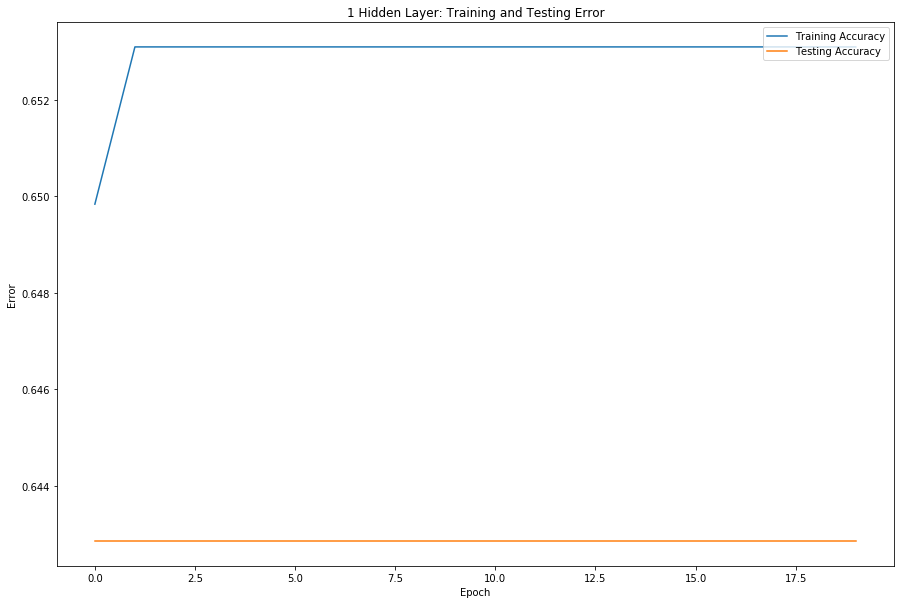

In [9]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1 Hidden Layer: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()


### Train vs Validation Loss

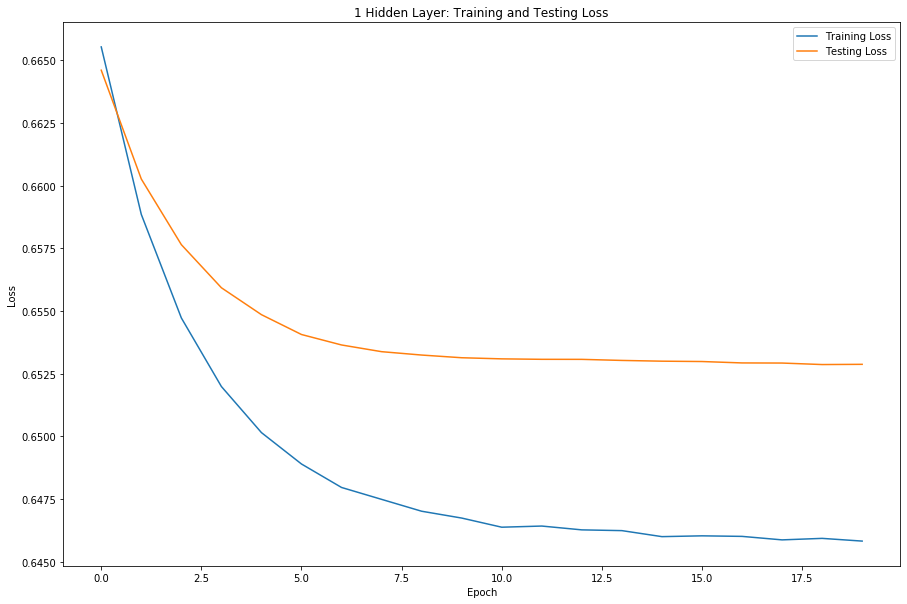

In [10]:
# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

# Part 2: Implementing a Neural Network with Three Hidden Layers

In [11]:
# Creating the model.
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=4)) # Hidden Layer 1
model.add(Dense(256, activation='relu')) # Hidden Layer 2
model.add(Dense(128, activation='relu')) # Hidden Layer 3
model.add(Dense(2, activation='sigmoid')) # Output Layer
visualizer(model, format='png', view=True)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training the model.
history = model.fit(Xtrain, to_categorical(Ytrain),
                    validation_data=(Xtest, to_categorical(Ytest)), epochs=20, batch_size=64)

# Evaluating the model
loss, accuracy = model.evaluate(Xtest, to_categorical(Ytest))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               2560      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 167,042
Trainable params: 167,042
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
10/10 [==============================] - 1s 18ms/step - loss: 0.6615 - accuracy: 0.6531 - val_loss: 0.6516 - val_accuracy: 0.6429
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6531 - 

## Plotting the graphs 

### Train vs Validation Accuracy

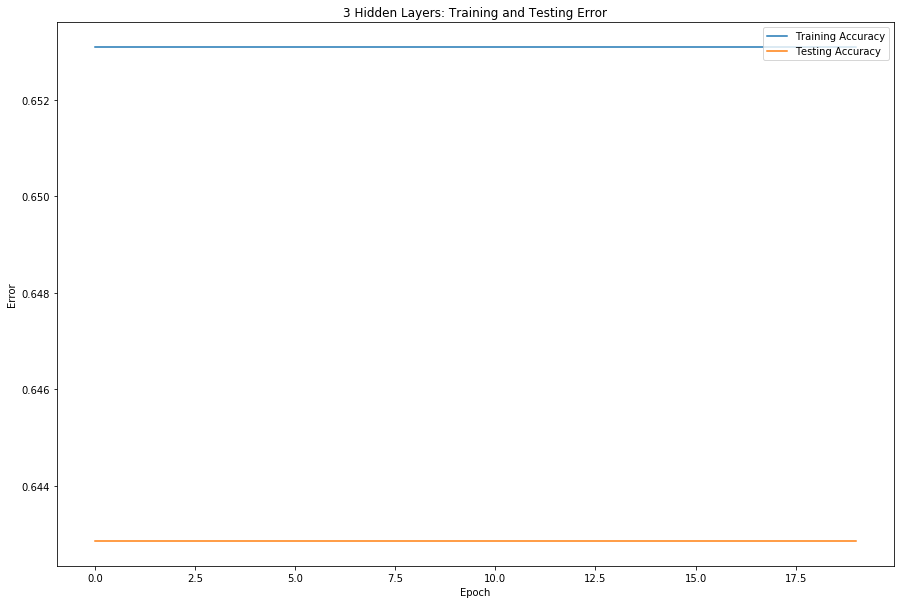

In [12]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()



### Train vs Validation Loss

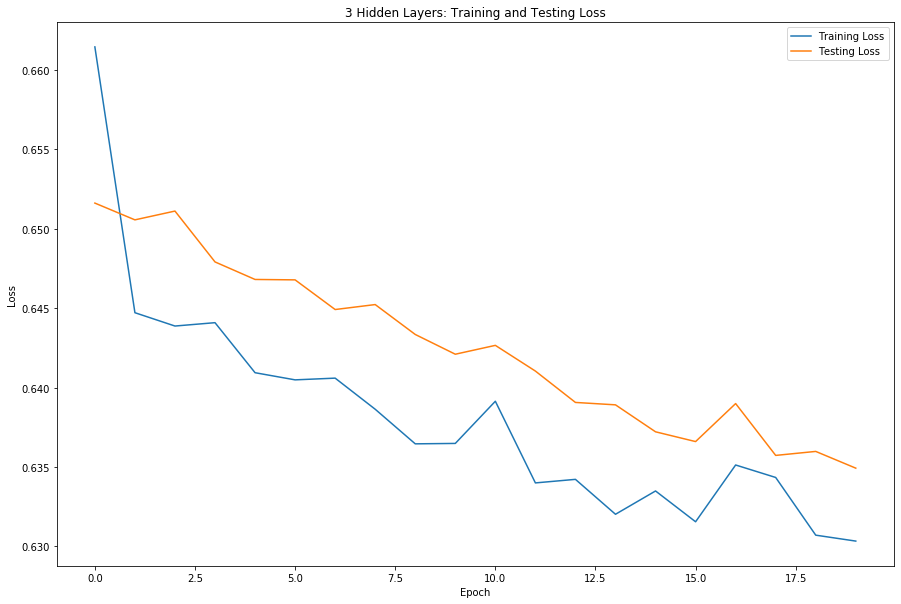

In [13]:
# Loss
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3 Hidden Layers: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()